In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve, accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [ ]:
df = pd.read_csv(r'C:\Users\Shubham\Desktop\Projects\Evaluation\Customer_Churn\Telecom_customer_churn.csv')

# Data Understanding

In [ ]:
pd.set_option("display.max_columns", None)
df.head() #Looking into the top 5 rows of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape #Cecking the shape of the dataset

(7043, 21)

In [ ]:
df.info() #Basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We see that most of the data here are object type, it is fine as most of them are classification type and we shall convert them in the Exploratory Data Analysis.

We also see that 'TotalCharges' column is an object type which is an abnormality as total charges are numerical type. This only means that there are null value. We shall look into it in EDA

In [ ]:
#Checing for number of ' ' values
(df['TotalCharges']==' ').sum()

11

In [ ]:
#Dropping the rows with 0 value in tenure
df.drop(df.loc[df['TotalCharges']==' '].index, inplace=True)

In [ ]:
df.shape #Cecking the shape of the dataset

(7032, 21)

Now that we have removed all the string type data, let us convert the column into numeric type to check if there is any other missing values

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

In [ ]:
df.isnull().sum() #Checking for null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Here we note that there are no null values present in the dataset

<AxesSubplot:>

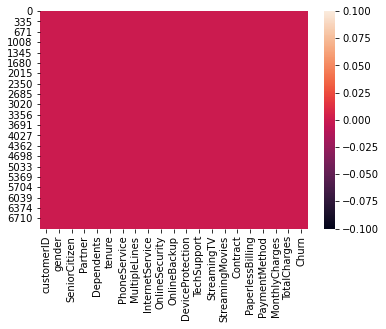

In [ ]:
sns.heatmap(df.isnull()) #Visualization of null values

In [ ]:
df.columns #Calling all the column names of the dataset

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Exploratory Data Analysis

Let us now look into all the columns one at a time, beginning with the target column 'Churn'

In [ ]:
#Checking for unique features in the column with the count
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

We see that the data is slightly imbalanced. We shall apply sampling method in the later stages. For now, let us convert them into numerical values using Label Encoder and plot them for visualization

In [ ]:
#Encoding data
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

<AxesSubplot:xlabel='Churn', ylabel='count'>

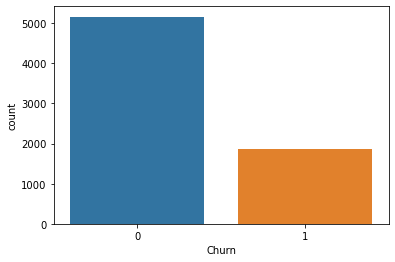

In [ ]:
#Count plot
sns.countplot(df['Churn'])

The next column we look into is the 'customerID'

In [ ]:
#Checking for number of unique features
df['customerID'].nunique()

7032

This shows that each of the data is unique for each customer, thereby acting as an index and hence shall not be included in the model for predicting churn. We will drop this column

In [ ]:
df.drop(columns='customerID', inplace=True)

The next column we look into is the 'gender'. We know its classification type and we shall convert it into numerical value

In [ ]:
#Checking for unique features in the column with the count
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [ ]:
#Encoding data
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

<AxesSubplot:xlabel='gender', ylabel='count'>

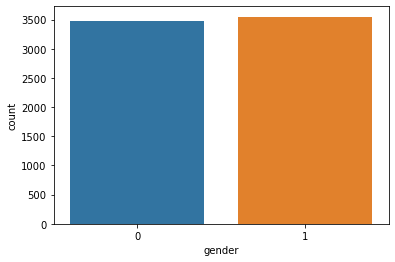

In [ ]:
#Count plot
sns.countplot(df['gender'])

The next column we look into is the 'SeniorCitizen'. We know its classification type

In [ ]:
#Checking for unique features in the column with the count
df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

The data here is already encoded one, 0 being no and 1 being yes

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

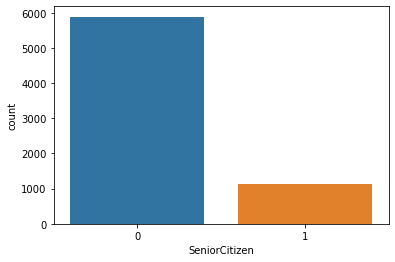

In [ ]:
#Count plot
sns.countplot(df['SeniorCitizen'])

The next column we look into is the 'Partner'. We know its classification type and we shall convert it into numerical data using encoding

In [ ]:
#Checking for unique features in the column with the count
df['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [ ]:
#Encoding data
le = LabelEncoder()
df['Partner'] = le.fit_transform(df['Partner'])

<AxesSubplot:xlabel='Partner', ylabel='count'>

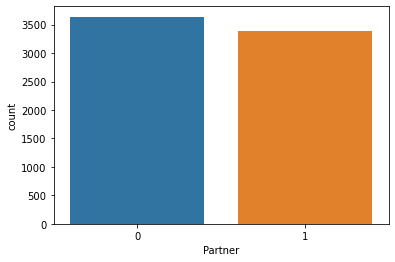

In [ ]:
#Count plot
sns.countplot(df['Partner'])

The next column we look into is the 'Dependents'. We know its classification type and we shall convert it into numerical data using encoding

In [ ]:
#Checking for unique features in the column with the count
df['Dependents'].value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [ ]:
#Encoding data
le = LabelEncoder()
df['Dependents'] = le.fit_transform(df['Dependents'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

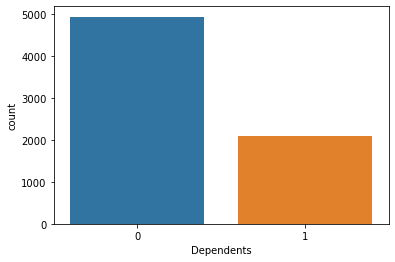

In [ ]:
#Count plot
sns.countplot(df['Dependents'])

The next column we look into is the 'tenure'. This data is a numerical regression column and we shall plot a density plot for the same

<AxesSubplot:xlabel='tenure', ylabel='Density'>

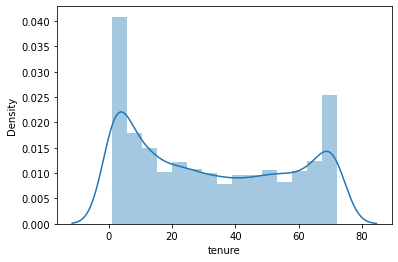

In [ ]:
#Density plot
sns.distplot(df['tenure'])

<AxesSubplot:xlabel='tenure'>

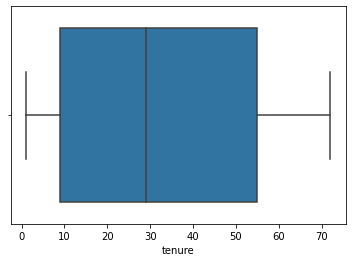

In [ ]:
#Box plot
sns.boxplot(df['tenure'])

The next column we look into is the 'PhoneService'. We know its classification type and we shall convert it into numerical data using encoding

In [ ]:
#Checking for unique features in the column with the count
df['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [ ]:
#Encoding data
le = LabelEncoder()
df['PhoneService'] = le.fit_transform(df['PhoneService'])

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

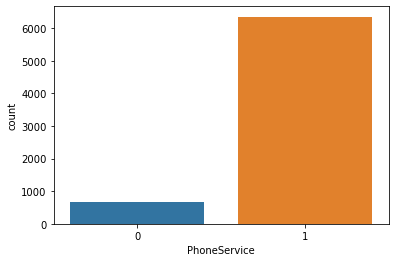

In [ ]:
#Count plot
sns.countplot(df['PhoneService'])

The next column we look into is the 'MultipleLines'. We know its classification type and we shall convert it into numerical data using encoding

In [ ]:
#Checking for unique features in the column with the count
df['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

Here, we see that 'No phone Service' value corresponds to the column 'PhoneService' which has already been accounted and hence we shall change this data to 'No' itself and hence make the column a classification between yes or no.

In [ ]:
#Replacing the values
df['MultipleLines'].replace({'No phone service':'No'}, inplace=True)

In [ ]:
#Checking unique features with count again
df['MultipleLines'].value_counts()

No     4065
Yes    2967
Name: MultipleLines, dtype: int64

In [ ]:
#Encoding data
le = LabelEncoder()
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

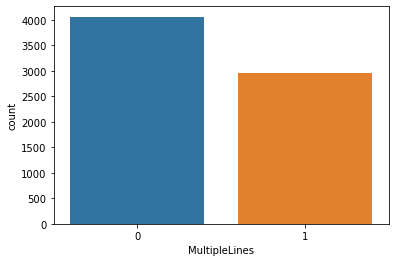

In [ ]:
#Count plot
sns.countplot(df['MultipleLines'])

The next column we look into is the 'InternetService'. We know its classification type and we shall convert it into numerical data using encoding

In [ ]:
#Checking for unique features in the column with the count
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [ ]:
#Encoding data
le = LabelEncoder()
df['InternetService'] = le.fit_transform(df['InternetService'])

<AxesSubplot:xlabel='InternetService', ylabel='count'>

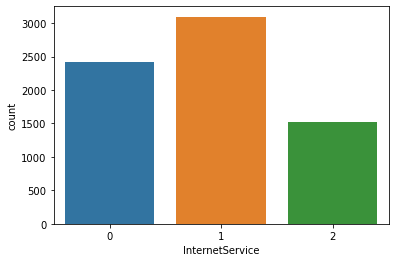

In [ ]:
#Count plot
sns.countplot(df['InternetService'])

The next column we look into is the 'OnlineSecurity'. We know its classification type and we shall convert it into numerical data using encoding

In [ ]:
#Checking for unique features in the column with the count
df['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

Here, we see that 'No internet service' value corresponds to the column 'InternetService' which has already been accounted and hence we shall change this data to 'No' itself and hence make the column a classification between yes or no.

In [ ]:
#Replacing the values
df['OnlineSecurity'].replace({'No internet service':'No'}, inplace=True)

In [ ]:
#Checking for unique features in the column with the count
df['OnlineSecurity'].value_counts()

No     5017
Yes    2015
Name: OnlineSecurity, dtype: int64

In [ ]:
#Encoding data
le = LabelEncoder()
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

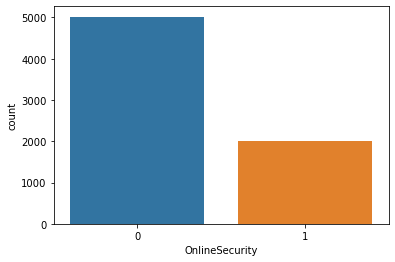

In [ ]:
#Count plot
sns.countplot(df['OnlineSecurity'])

The next column we look into is the 'OnlineBackup'. We know its classification type and we shall convert it into numerical data using encoding

In [ ]:
#Checking for unique features in the column with the count
df['OnlineBackup'].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

Here, we see that 'No internet service' value corresponds to the column 'InternetService' which has already been accounted and hence we shall change this data to 'No' itself and hence make the column a classification between yes or no.

In [ ]:
#Replacing the values
df['OnlineBackup'].replace({'No internet service':'No'}, inplace=True)

In [ ]:
#Checking for unique features in the column with the count
df['OnlineBackup'].value_counts()

No     4607
Yes    2425
Name: OnlineBackup, dtype: int64

In [ ]:
#Encoding data
le = LabelEncoder()
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

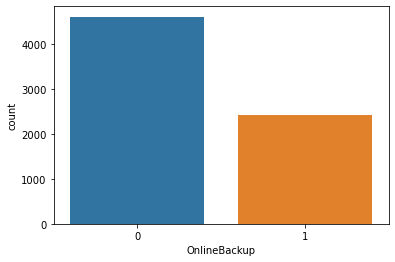

In [ ]:
#Count plot
sns.countplot(df['OnlineBackup'])

The next column we look into is the 'DeviceProtection'. We know its classification type and we shall convert it into numerical data using encoding

In [ ]:
#Checking for unique features in the column with the count
df['DeviceProtection'].value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

Here, we see that 'No internet service' value corresponds to the column 'InternetService' which has already been accounted and hence we shall change this data to 'No' itself and hence make the column a classification between yes or no.

In [ ]:
#Replacing the values
df['DeviceProtection'].replace({'No internet service':'No'}, inplace=True)

In [ ]:
#Checking for unique features in the column with the count
df['DeviceProtection'].value_counts()

No     4614
Yes    2418
Name: DeviceProtection, dtype: int64

In [ ]:
#Encoding data
le = LabelEncoder()
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

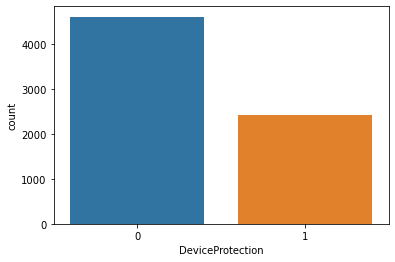

In [ ]:
#Count plot
sns.countplot(df['DeviceProtection'])

The next column we look into is the 'TechSupport'. We know its classification type and we shall convert it into numerical data using encoding

In [ ]:
#Checking for unique features in the column with the count
df['TechSupport'].value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

Here, we see that 'No internet service' value corresponds to the column 'InternetService' which has already been accounted and hence we shall change this data to 'No' itself and hence make the column a classification between yes or no.

In [ ]:
#Replacing the values
df['TechSupport'].replace({'No internet service':'No'}, inplace=True)

In [ ]:
#Checking for unique features in the column with the count
df['TechSupport'].value_counts()

No     4992
Yes    2040
Name: TechSupport, dtype: int64

In [ ]:
#Encoding data
le = LabelEncoder()
df['TechSupport'] = le.fit_transform(df['TechSupport'])

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

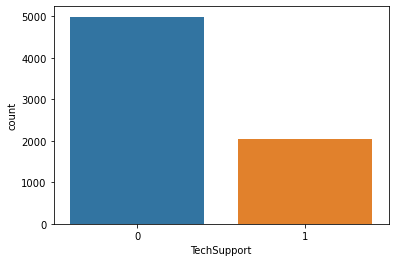

In [ ]:
#Count plot
sns.countplot(df['TechSupport'])

The next column we look into is the 'StreamingTV'. We know its classification type and we shall convert it into numerical data using encoding

In [ ]:
#Checking for unique features in the column with the count
df['StreamingTV'].value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [ ]:
#Replacing the values
df['StreamingTV'].replace({'No internet service':'No'}, inplace=True)

In [ ]:
#Checking for unique features in the column with the count
df['StreamingTV'].value_counts()

No     4329
Yes    2703
Name: StreamingTV, dtype: int64

In [ ]:
#Encoding data
le = LabelEncoder()
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

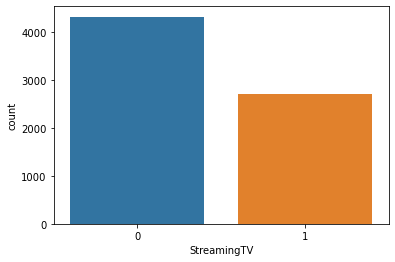

In [ ]:
#Count plot
sns.countplot(df['StreamingTV'])

The next column we look into is the 'StreamingMovies'. We know its classification type and we shall convert it into numerical data using encoding

In [ ]:
#Checking for unique features in the column with the count
df['StreamingMovies'].value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

Here, we see that 'No internet service' value corresponds to the column 'InternetService' which has already been accounted and hence we shall change this data to 'No' itself and hence make the column a classification between yes or no.

In [ ]:
#Replacing the values
df['StreamingMovies'].replace({'No internet service':'No'}, inplace=True)

In [ ]:
#Checking for unique features in the column with the count
df['StreamingMovies'].value_counts()

No     4301
Yes    2731
Name: StreamingMovies, dtype: int64

In [ ]:
#Encoding data
le = LabelEncoder()
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

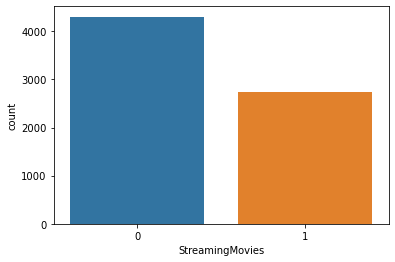

In [ ]:
#Count plot
sns.countplot(df['StreamingMovies'])

The next column we look into is the 'Contract'. We know its classification type and we shall convert it into numerical data using encoding

In [ ]:
#Checking for unique features in the column with the count
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [ ]:
#Encoding data
le = LabelEncoder()
df['Contract'] = le.fit_transform(df['Contract'])

<AxesSubplot:xlabel='Contract', ylabel='count'>

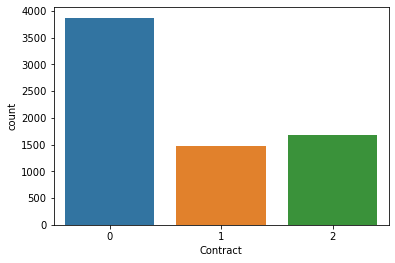

In [ ]:
#Count plot
sns.countplot(df['Contract'])

The next column we look into is the 'PaperlessBilling'. We know its classification type and we shall convert it into numerical data using encoding

In [ ]:
#Checking for unique features in the column with the count
df['PaperlessBilling'].value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

In [ ]:
#Encoding data
le = LabelEncoder()
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

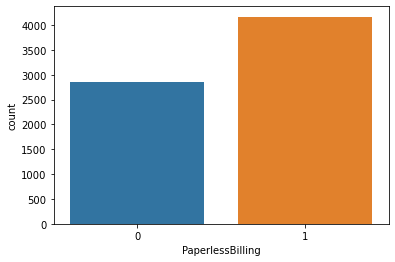

In [ ]:
#Count plot
sns.countplot(df['PaperlessBilling'])

The next column we look into is the 'PaymentMethod'. We know its classification type and we shall convert it into numerical data using encoding

In [ ]:
#Checking for unique features in the column with the count
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [ ]:
#Encoding data
le = LabelEncoder()
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

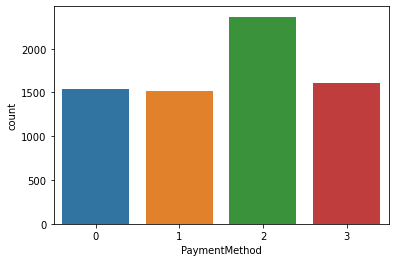

In [ ]:
#Count plot
sns.countplot(df['PaymentMethod'])

The next column we look into is the 'MonthlyCharges'. We know its regression type and we shall plot density and box plot

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

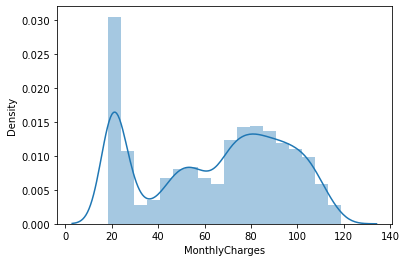

In [ ]:
#Density plot
sns.distplot(df['MonthlyCharges'])

<AxesSubplot:xlabel='MonthlyCharges'>

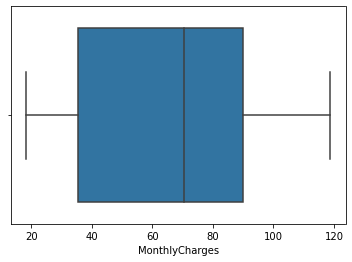

In [ ]:
#Box plot
sns.boxplot(df['MonthlyCharges'])

The next column we look into is the 'TotalCharges'. We know its regression type and we shall plot density and box plot

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

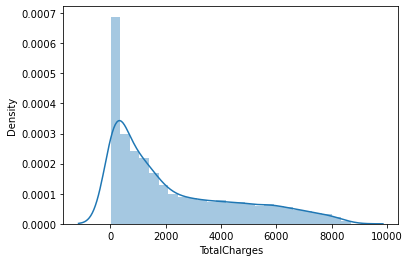

In [ ]:
#Density plot
sns.distplot(df['TotalCharges'])

<AxesSubplot:xlabel='TotalCharges'>

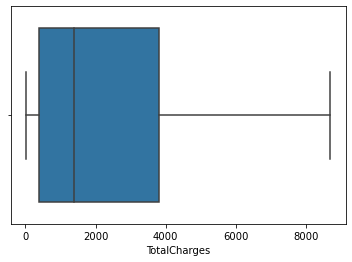

In [ ]:
#Box plot
sns.boxplot(df['TotalCharges'])

# Correlation

Now, since all the data has been transformed into numeric values. Let us check for the correlation to the target column

In [ ]:
df.corr() #Correlation matrix

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.002236,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.032160,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.000513,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.044030,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,-0.029835,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,0.387266,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.011346,0.098592,0.202228,0.201733,0.100421,0.257804,0.259194,0.107529,0.163746,-0.171240,0.490912,0.469042,0.040033
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,0.011346,1.000000,-0.392174,-0.313708,-0.305757,-0.388535,-0.241330,-0.250144,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,-0.392174,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,0.245660,-0.004051,-0.149112,0.296447,0.412619,-0.171270
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,-0.313708,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,0.155262,0.127056,-0.170720,0.441529,0.510100,-0.082307


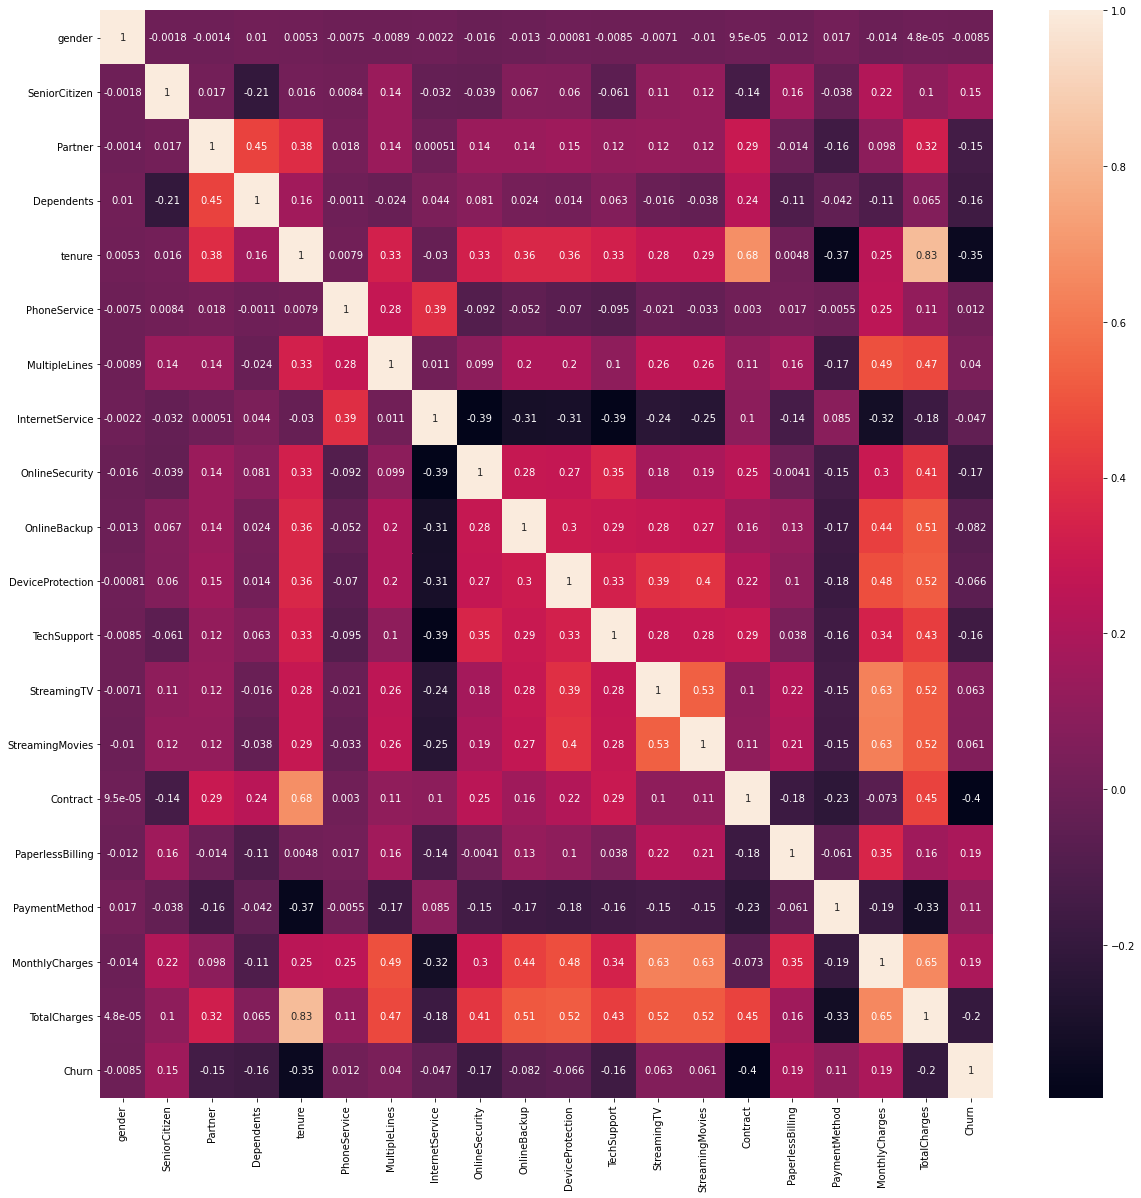

In [ ]:
#Visualization for correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
#Correlation wrt target column
df.corr()['Churn'].sort_values()

Contract           -0.396150
tenure             -0.354049
TotalCharges       -0.199484
OnlineSecurity     -0.171270
TechSupport        -0.164716
Dependents         -0.163128
Partner            -0.149982
OnlineBackup       -0.082307
DeviceProtection   -0.066193
InternetService    -0.047097
gender             -0.008545
PhoneService        0.011691
MultipleLines       0.040033
StreamingMovies     0.060860
StreamingTV         0.063254
PaymentMethod       0.107852
SeniorCitizen       0.150541
PaperlessBilling    0.191454
MonthlyCharges      0.192858
Churn               1.000000
Name: Churn, dtype: float64

We see that contract and tenure has the highest negative correlation

# Outliers

From the above data visualization in the EDA, we see that most of the data are classification type and the few regression columns with their boxplots show that there are no outliers present. Hence, we shall not treat the data for outliers

# Skewness

Since there are no outliers present in the data, however the data being little skewed in one column. The data present in the column is precious and we shall not treat for skewness either

# Splitting the dataset

Now, we split the data into feature and target columns

In [ ]:
x = df.drop(columns='Churn') #Indeependent variable
y = df['Churn'] #Dependent variable

# Best Random State

In [ ]:
maxRS = 0
maxAcc = 0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
print("Max accuracy: \t", maxAcc)
print("Random State: \t", maxRS)

Max accuracy: 	 0.8208955223880597
Random State: 	 14


Now since we got the best random state for data modelling, we create the test train models

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=maxRS)

# Balancing the Train Data

In [ ]:
train = pd.concat([x_train,y_train], axis=1)

In [ ]:
more = train[train['Churn']==0] # No  -> 0
less = train[train['Churn']==1] # Yes -> 1

In [ ]:
upsample = resample(less,
                    replace=True, #Sample with replacement
                    n_samples=len(more), #matching with the majority class
                    random_state=maxRS) #Reproductible results

In [ ]:
new = pd.concat([more,upsample])

In [ ]:
new['Churn'].value_counts()

0    4114
1    4114
Name: Churn, dtype: int64

In [ ]:
x_train = new.drop(columns='Churn')
y_train = new['Churn']

# Model Predictions

Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 74.4136460554371
[[747 302]
 [ 58 300]]
              precision    recall  f1-score   support

           0       0.93      0.71      0.81      1049
           1       0.50      0.84      0.62       358

    accuracy                           0.74      1407
   macro avg       0.71      0.78      0.72      1407
weighted avg       0.82      0.74      0.76      1407



K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 67.590618336887
[[695 354]
 [102 256]]
              precision    recall  f1-score   support

           0       0.87      0.66      0.75      1049
           1       0.42      0.72      0.53       358

    accuracy                           0.68      1407
   macro avg       0.65      0.69      0.64      1407
weighted avg       0.76      0.68      0.70      1407



Support Vector Classifier

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 69.65174129353234
[[764 285]
 [142 216]]
              precision    recall  f1-score   support

           0       0.84      0.73      0.78      1049
           1       0.43      0.60      0.50       358

    accuracy                           0.70      1407
   macro avg       0.64      0.67      0.64      1407
weighted avg       0.74      0.70      0.71      1407



Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 72.92110874200426
[[865 184]
 [197 161]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1049
           1       0.47      0.45      0.46       358

    accuracy                           0.73      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.73      0.73      0.73      1407



Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 79.24662402274343
[[919 130]
 [162 196]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1049
           1       0.60      0.55      0.57       358

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407



We see that the Random Forest Classifier gives the most efficiency of 79.24%

# Cross Validation

In [ ]:
scr1 = cross_val_score(lr, x, y, cv=5)
print("Cross validation score of Logistic Regression is: \t", scr1.mean())

Cross validation score of Logistic Regression is: 	 0.80218972198548


In [ ]:
scr2 = cross_val_score(knn, x, y, cv=5)
print("Cross validation score of KNN is: \t", scr2.mean())

Cross validation score of KNN is: 	 0.7609496714759872


In [ ]:
scr3 = cross_val_score(svc, x, y, cv=5)
print("Cross validation score of SVC is: \t", scr3.mean())

Cross validation score of SVC is: 	 0.7342150252598014


In [ ]:
scr4 = cross_val_score(dt, x, y, cv=5)
print("Cross validation score of Decision Tree is: \t", scr4.mean())

Cross validation score of Decision Tree is: 	 0.7286661591453422


In [ ]:
scr5 = cross_val_score(rf, x, y, cv=5)
print("Cross validation score of Random Forest is: \t", scr5.mean())

Cross validation score of Random Forest is: 	 0.7873992160716434


We can see that Logistic Regression performs the best among others, however, Random Forest is close second and hence we can use it.

# Hyper Parameter Tuning

In [ ]:
GridSearchCV.get_params(rf) #Getting the parameters for RandonForrestClassifier

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Adding parameters to tune the model to best efficiency
parameters = {'bootstrap': [True,False],
              'max_depth': [10, 20, 30, None],
              'min_samples_leaf': [1, 2],
              'min_samples_split': [2, 5],
              'n_estimators': [200, 400]}

In [ ]:
gcv = GridSearchCV(rf, parameters, cv=5, scoring='accuracy')

In [ ]:
#Fitting the parameters
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400]},
             scoring='accuracy')

In [ ]:
#Finding the best score
gcv.best_score_

0.9126149050659791

In [ ]:
#Finding the best parameters
gcv.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
gcv_pred = gcv.best_estimator_.predict(x_test)
accuracy_score(y_test,gcv_pred)

0.8002842928216063

We see the accuracy has increased to 80.02%

# ROC AUC Plot

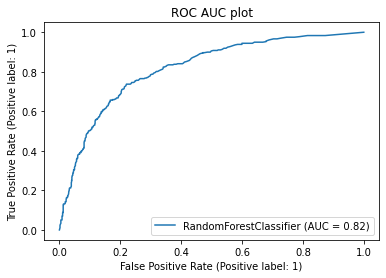

In [ ]:
plot_roc_curve(gcv.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

The AUC score of 82% is very good

# Saving the best model

In [ ]:
joblib.dump(gcv.best_estimator_,"churn.pkl")

['churn.pkl']